In order to successfully complete this assignment you need to submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

Members of the same group can submit the same notebook. You don't need to create your own.

### <p style="text-align: right;"> &#9989; Put your group's name here cmse802-cell-tower-power </p>

# __Graph 2: Tower problem__

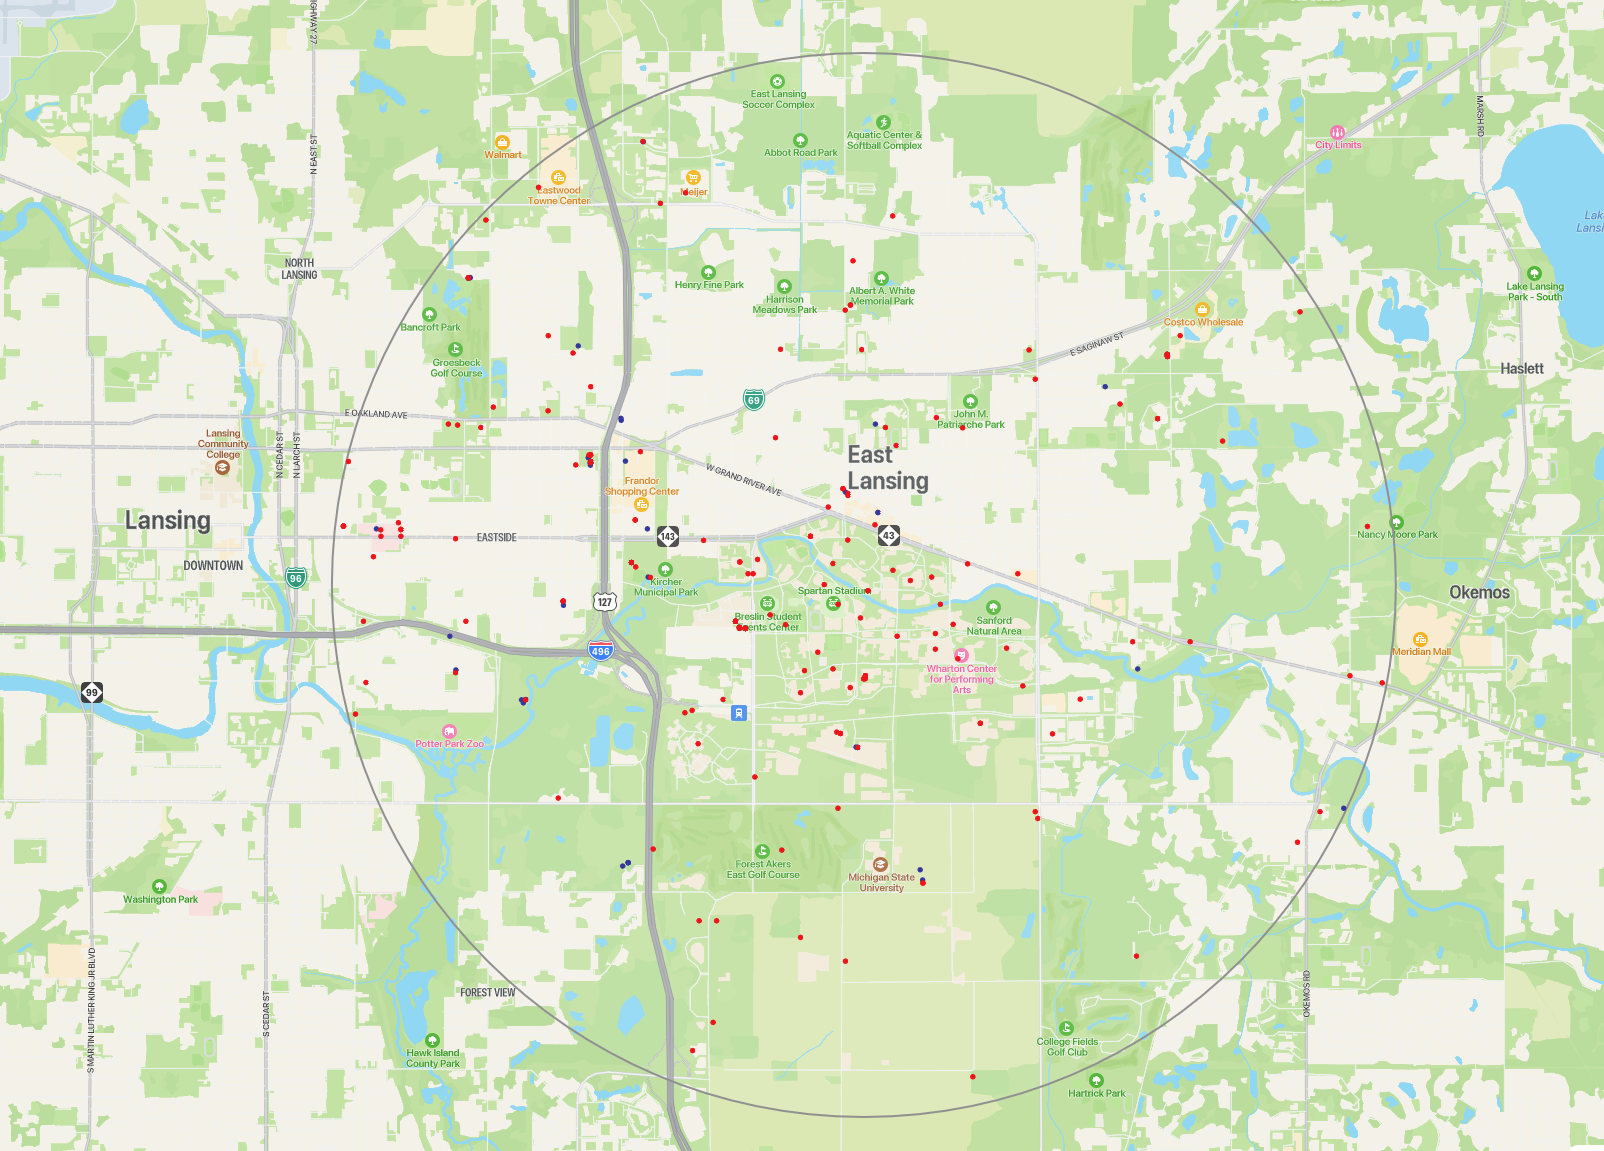
From [Antenna search](https://www.antennasearch.com/HTML/search/search.php?address=426+Auditorium+Road%2C+East+Lansing%2C+MI+48824%2C+United+States)

# Learning objectives

At the end of the exercise, you should be able to:
- Get first hand experience working in a team developing codes.
- Generate k-neareast neighbor graph.
- Assign a specific color scheme to better visualize your graph.
- Plot objects with location info on a map.

# Outline
</p>

1. [Review of pre-class assignment](#preclass)
2. [Group Programming Project](#T2)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

----
<a name="Group_programming_Project"></a>
# 2. Group programming Project

## 2.1 The tasks

Today you are given the task of working on the tower problem as a project! The project is broken down the following programming components:

- [Download and import the data](#S1)
- [Calculate k Nearest Neighbors](#S2)
- [Greedy Graph Coloring](#S3)
- [Plot tower colors on a map](#S4)

Note that you have worked out some aspects of these components in pre-class. Assuming we get all of these steps written as fucntions we could immagine a wrapper program of the following form

```Python
locations = ReadTowerData(filename)
graph = kNN(locations,k)
colors = GreedyGraphColoring(graph, M)
mapplot(locations, colors)
```

Where each of the variables are of the following types:

- ```locations``` - $2 \times n$ numpy array of logitude and latitude point locaitons. 
- ```graph``` - adjecency graph represented as a dictionary.
- ```colors``` - $n$ list of numbers representing colors.  It's just indexes in the range $0-M$ where $M$ is just the number of colors we need to assign. 

We are going to try to write each component seperatly and then assemble them as a team. 

## 2.2 Division of labors

&#9989; <font color=blue>**DO THIS:**</font> As a class break up into two groups, each group has:

- A name: name your group something fierce.
- A manager
- Three programming teams A, B, and C

<font size=+3>&#9998;</font> Put your group info here:
- __Group name__:cmse802-cell-tower-power -
- __Manager__:  Leo, Ha Eun 
- __Team A__: Pavan, Sandeep, Yash
- __Team B__: Gerson, Avirup, Toshi 
- __Team C__:  Romilly, Max, Hyerin

### The manager's job

The manager will:

- Create a git repository and share it with their group who will establish Python programs.
- Create a wrapper program (a .ipynb file) by importing the programs from subgroups and organize the functions together while the subgroups are working on their codes. For example:
  ```Python
from ReadTowerData import ReadTowerData
from kNN import kNN
from GreedyGraphColoring import GreedyGraphColoring
from mapplot import mapplot
locations = ReadTowerData(filename)
graph = kNN(locations,k)
colors = GreedyGraphColoring(graph, M)
mapplot(locations, colors)
```
- Monitor the progress, provide assistance when you finish the above.
- Collect finished code and distribute among members.

**At the end of the class, each member should submit a folder that contains all the .py files created by each group, the .ipynb file created by the manage, as well as the michigan's map with markers in .html format generated by the .ipynb file.**



### The task of the programming teams

- Step 2 (Click the link to find out what you need to do and then come back)
  - [Team A](#S2): Define the nearest neighbor graph function
  - [Team B](#S3): Define the greedy coloring function
  - [Team C](#S4): Define the import data function and the tower color map plotting function
  
For each team:
1. Write a stub function for your part. A stub function provides the inputs and outputs in a format that can be tested by the other groups. We need to agree and share stub functions using the git repository. (this is probably as far as we will get today).
1. After each step graph or plot the output to make sure it is in the expect form.  
1. Write some test functions that send different data into your function and make sure it works as expected.
1. Lint your code and include Docstrings.
1. Update your stub function with the final version in the git repostiory. 
1. Provide the code blocks you are responsible for in this notebook to your manager.

Key to the success of this project is careful communication between the groups.  If a group gets done early and join the managment group to help each other out. Good luck!

&#9989; <font color=blue>**DO THIS:**</font> Manager: Put the address of your git repository in the cell below.

<font size=+3>&#9998;</font> Your Git repo address.

----
<a name="S1"></a>
## Step 1 (Group C). Import the data

```
locations = ReadTowerData(filename)
```

We will be using antenna data from the following website:

http://www.antennasearch.com/

The given csv file contains the locations of all towers in a 3.0 Mile radius from the MSU engineering building (428 S Shaw Ln, East Lansing, MI 48824). **Latitude, Logitude = 42.7370, -84.4839**

Based on the code in the cell below, **group C will write a `.py` file for the function of ReadTowerData(filename).**
**The other groups can use it for testing and developing their code if applicable.**

Text(0, 0.5, 'latitude')

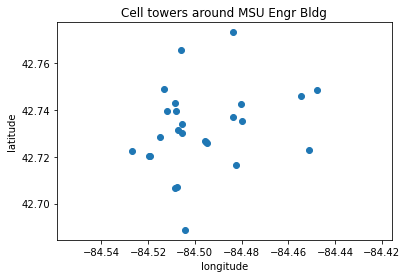

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

csvfile = 'TowersJRK700541VJG782351.csv' # Note that you need a file for this to work
tower_data = csv.reader(open(csvfile, 'r'), delimiter=',', quotechar='"')
rows=[]
for row in tower_data:
    rows.append(row)

latitude = 3
longitude = 4

locations = np.zeros([len(rows)-1,2])

for i in range(1,len(rows)):
    locations[i-1, 1] = float(rows[i][latitude])
    locations[i-1, 0] = float(rows[i][longitude])
    
plt.scatter(locations[:,0], locations[:,1]);
plt.axis('equal');
plt.title('Cell towers around MSU Engr Bldg')
plt.xlabel('longitude')
plt.ylabel('latitude')  

----
<a name="S2"></a>
## Step 2 for Group A: Calculate K-Nearest Neighbors

You goal is to write a `kNN` function that take `locations` (from step 1) and `k` (an interger value), determine the k-neareast neighbors and return a `networkX` `graph` object: 

```
graph = kNN(locations,k)
```

&#9989; **<font color=red>Make your stub:</font>** Write a function that takes a set of locations as an $n \times 2$ numpy matrix, and a parameter $k$, and returns a random networkx graph.  Doesn't have to be complex just something that can be easily passed on to the graph coloring function. Commit this to the repo so that other groups have the ability to use it to test their code right away.

&#9989; **<font color=red>First version:</font>** In the preclass, you attempted to write code to generate the [kNN graph](https://en.wikipedia.org/wiki/Nearest_neighbor_graph) for one adjacent neighbor. 
This function should take a set of locations as an $n \times 2$ numpy matrix and returns a networkx graph.  Work together to check your work, and push the result to the repository.

&#9989; **<font color=red>Add parameter k:</font>** Modify your function to accept an $n \times 2$ numpy matrix as well as an integer $k$ for the number of nearest neighbors to attach to each vertex. Make sure your code returns a networkx graph, and push the result to the repo.

&#9989; **<font color=red>Finalize and create `.py` file:</font>** Finalize your function and once you are sure it works, turn it into a Python `.py` file for your manager to import.

In [86]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.pyplot as plt


def KNN(locations,k):
    # locations is a n*2 matrix where 1st col is lattitude and 2nd col is longitude .
    # k is neasest neighbours count to be grouped into a graph G
    N = locations.shape[0]
    G = nx.Graph()
    G.add_nodes_from(list(range(N)))
    d_ij = np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            d_ij[i][j] = distance_matrix([locations[i,:]],[locations[j,:]])
    
    
    
    for i in range(N):
        sort_dij = []
        #print(np.argsort(d_ij,axis=1)[0][1:k+1])
        sort_dij = np.argsort(d_ij,axis=1)[i][1:k+1]
        print((sort_dij))
        
        for o in range(k):
            G.add_edge(i,sort_dij[o])

            
        

    return G

knn_graph=KNN(locations,4)

[25 12  5  8]
[ 6 12  5 21]
[23 10 22  6]
[18  4 19 16]
[19 18 21 22]
[12  9  1  6]
[21 22  1 23]
[11 24 20 16]
[ 0 25 12  5]
[ 5 12  1  6]
[23  2 13 22]
[ 7 24 20 16]
[5 9 1 6]
[10  2 23 22]
[13 10 15 23]
[14 20 17 16]
[17 20 18  4]
[16 20 18 19]
[ 4 19 21 22]
[ 4 18 21 22]
[17 16 18 19]
[ 6 22  1 23]
[ 6 21 23  2]
[10  2 22  6]
[11  7 16  3]
[ 0 12  5  8]


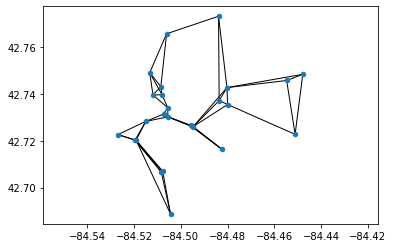

In [52]:
node_pos = {}

for v in G.nodes():
    node_pos[v] = locations[v,:]

fig, ax = plt.subplots()
nx.draw(G, node_pos, node_size=20)
limits = plt.axis('on')
plt.axis('equal');
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [3]:
import numpy as np
N=50
d_ij = np.zeros([N,N])

In [9]:
np.sort(d_ij[0,:])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#put your first version here


In [49]:
#put your final nearest neighbor graph function here 

import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors  # 

nbrs = NearestNeighbors(n_neighbors=3, algorithm= 'ball_tree').fit(locations)

dist, nei =nbrs.kneighbors(locations)
nei[:,1:3]

array([[25, 12],
       [ 6, 12],
       [23, 10],
       [18,  4],
       [19, 18],
       [12,  9],
       [21, 22],
       [11, 24],
       [ 0, 25],
       [ 5, 12],
       [23,  2],
       [ 7, 24],
       [ 5,  9],
       [10,  2],
       [13, 10],
       [14, 20],
       [17, 20],
       [16, 20],
       [ 4, 19],
       [ 4, 18],
       [17, 16],
       [ 6, 22],
       [ 6, 21],
       [10,  2],
       [11,  7],
       [ 0, 12]], dtype=int64)

In [ ]:
number_of_towers = locations.shape[0]

knn_graph = nx.Graph()
knn_graph.add_nodes_from(list(range(number_of_towers)))

for i in range(len(locations)):
    


node_pos = {}     

for node in knn_graph.nodes():
    node_pos[node] = locations[node,:]

fig, ax = plt.subplots()
nx.draw(knn_graph,node_pos, node_size = 20)
limits = plt.axis('on')
plt.axis('equal');
ax.tick_params(left = True, bottom = True,labelleft=True, labelbottom=True)

In [58]:
!pip install folium

In [74]:
def GreedyGraphColoring(knn_graph):
    c_map = {0: 'green', 1: 'red', 2: 'pink', 3: 'orange', 4: 'black'}
    d = nx.coloring.greedy_color(knn_graph)
    nd = dict(sorted(d.items()))

    colors=[]
    
    for i in nd:
        colors.append(c_map.get(nd[i]))
    
    return colors

In [81]:
def mapplot(locations, colors):
    %matplotlib inline
    import folium

    c_map = {0: 'green', 1: 'red', 2: 'pink', 3: 'orange', 4: 'black'}
    map_msu = folium.Map(location=[42.7370, -84.4839])
    for i in range(0,len(locations)):
        folium.Marker([locations[i,1],locations[i,0]], \
                      icon=folium.Icon(color=colors[i])).add_to(map_msu)
    map_msu.save("map_msu_cell_towers.html")
    return map_msu


In [84]:
colors = GreedyGraphColoring(G)
map_p = mapplot(locations, colors)

In [85]:
map_p

----
<a name="S3"></a>
## Step 2 for Group B: Greedy Graph Coloring

You goal is to write a `GreedyGraphColoring` function that takes a `graph` object and return a `colors` dictionary object with [greedy coloring](https://en.wikipedia.org/wiki/Graph_coloring#Greedy_coloring):

```
colors = GreedyGraphColoring(graph)
```

&#9989; **<font color=red>Write your stub:</font>** Write a stub function that takes a networkx graph as an input and assigns random colors to each node in the graph, represented as a dictionary. So, the number of nodes in your output dictinary should be the same as the number of nodes in the starting graph,  $n$, with color names (e.g., "black", "blue", "organge", ..etc) as values.

&#9989; **<font color=red>Modify your code:</font>** Modify your function  to apply the  greedy graph coloring algorithm on the network using the networkx implementation and output the colors as a list as described above.  

HINT: If you use an external library, the hardest part of this algorithm may be data converting from a dictionary to whatever format the library uses.  If done right, it is possible that the function is just a bunch of lines of code.  

&#9989; **<font color=red>Finalize and create `.py` file:</font>** Finalize your function and once you are sure it works, turn it into a Python `.py` file for your manager to import.

In [ ]:
#put your stub function here


In [87]:
#put your actual function here, feel free to use the external package networkx as indicated below
import networkx as nx

d = nx.coloring.greedy_color(G)
nd = dict(sorted(d.items()))

c_map = {0: 'green', 1: 'red', 2: 'pink', 3: 'orange', 4: 'black'}


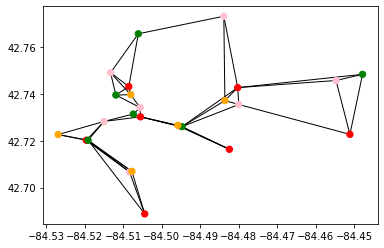

In [88]:
#put your plotting/testing code here
    
   
fig, ax = plt.subplots()
nx.draw(G,node_pos, node_size = 40, node_color = colors)
limits = plt.axis('on')
ax.tick_params(left = True, bottom = True,labelleft=True, labelbottom=True)   

----
<a name="S4"></a>
## Step 2 for Group C : Plot tower colors on a map

You goal is to write a `mapplot` function that take a `locations` object from step 1 and a `colors` object and plot the locations of the tower on a nice map and __save it__:

```
mapplot(locations, colors)
```

&#9989; **<font color=red>Make your stub:</font>** Write a stub function that takes an $n \times 2$ numpy array of locations and a  colors dictionary with $n$ keys and each key's value is a random number from 1 to 5. The stub code should plot the locations in the first array.  The stub function can just use a simple ```scatter``` plot.  

&#9989; **<font color=red>First modification:</font>** Extend the stub function to then color the plot using a different color for each number in the color index list.  Assign a unique color for each index.  

&#9989; **<font color=red>Harder modification:</font>** Write a function that takes a graph and a list of color indexes and plots them on a map of Michigan State. Similar to the following:

<img src="https://lh6.googleusercontent.com/qSPlrmlnBqN7JZu_U_zaOydbFhekPtQhYk2s0fmMo__5YktgYXWuenVkKATZ0uaDNfrex51kUW8SseGjFMMcL8yYPcuMc3_o5H125HMzvI1wd91ZM8XV98tLx23-=w740" width="33%">

**Hint**: I highly recommend using the [folium](https://python-visualization.github.io/folium) library.

&#9989; **<font color=red>Finalize and create `.py` file:</font>** Finalize your function and once you are sure it works, turn it into a Python `.py` file for your manager to import.

In [89]:
#put your stub function here
mapplot(locations, colors)
def mapplot(locations, colors):
    import folium

    c_map = {0: 'green', 1: 'red', 2: 'pink', 3: 'orange', 4: 'black'}
    map_msu = folium.Map(location=[42.7370, -84.4839])
    for i in range(0,len(locations)):
        folium.Marker([locations[i,1],locations[i,0]], \
                  icon=folium.Icon(color=c_map[(colors[i])])).add_to(map_msu)
    map_msu.save("map_msu_cell_towers.html")
    map_msu


In [90]:
#put your actual function here, feel free to make use the all or part of the provided code below
%matplotlib inline
import folium

c_map = {0: 'green', 1: 'red', 2: 'pink', 3: 'orange', 4: 'black'}
map_msu = folium.Map(location=[42.7370, -84.4839])
for i in range(0,len(locations)):
    folium.Marker([locations[i,1],locations[i,0]], \
                  icon=folium.Icon(color=colors[i])).add_to(map_msu)
map_msu.save("map_msu_cell_towers.html")
map_msu

In [ ]:
#put your plotting/testing code here


for i in range(0,len(locations)):
    print

----
<a name="S4"></a>
## Step 3 (manager): Assemble functions and run the codes

In [ ]:
#put your first version here
%reload_ext autoreload
%autoreload 2

from ReadTowerData import ReadTowerData
from kNN import kNN
from GreedyGraphColoring import GreedyGraphColoring
from mapplot import mapplot

locations = ReadTowerData(filename)
graph = kNN(locations,k)
colors = GreedyGraphColoring(graph)
mapplot(locations, colors)

&#9989; <font color=red>**QUESTION:**</font> Did it work? If not, what's the problem?

<font size=+3>&#9998;</font> Put your answer to the above question here

-----
### Congratulations, we're done!

&#169; Copyright 2021,  Michigan State University Board of Trustees